<center><h2><b>HEALTH SECTOR PROJECT</b></h2></center>

<h2>Analysis on the health sectors on the number of patiences highly affected on specific diseases</h2>

<h2><b>1.0-Business Understanding </b></h2>

<h3>Identifying the number of patients mostly affected by a specific disease.<br> <br>The number of maternal mortalities and the kind of vaccines used on the patient. <br> <br>The age bracket is highly affected by a specific disease and there mortality rate.<br><br>The localities highly affected by a certain disease over a given period </h3>

<h3><b>1.1 Project objectives</b></h3>

<h4>Reduce malaria incidence by 30% in children under 5 in Region X through bed-net distribution and community awareness campaigns <br><br> Increase HIV testing coverage from 50% to 80% among high-risk populations in Urban Y by 2025 via mobile clinics and targeted outreach<br><br>
</h4>

<h2>2-Data Understanding</h2>

<h3>2.1Python libraries Importation</h3>

In [1]:
#begin by importing necessary data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2>2.2 opening the file using pandas libriary</h2>

In [2]:
health=pd.read_csv("data.csv",encoding="latin-1",low_memory=False)


<h2>2.3- open the first 5 elements</h2>

In [3]:
health.tail(10)

,countries,year,"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)",Unnamed: 5,Unnamed: 6,Unnamed: 7
3651,Zimbabwe,2008.0,32.1,32.4,32.0,NaN,NaN,NaN
3652,Zimbabwe,2007.0,29.7,30.1,29.5,NaN,NaN,NaN
3653,Zimbabwe,2006.0,27.0,26.5,27.5,NaN,NaN,NaN
3654,Zimbabwe,2005.0,25.8,26.3,25.4,NaN,NaN,NaN
3655,Zimbabwe,2004.0,24.5,24.6,24.5,NaN,NaN,NaN
3656,Zimbabwe,2003.0,23.1,23.5,22.7,NaN,NaN,NaN
3657,Zimbabwe,2002.0,22.7,24.1,21.5,NaN,NaN,NaN
3658,Zimbabwe,2001.0,21.7,23.6,20.2,NaN,NaN,NaN
3659,Zimbabwe,2000.0,21.4,23.3,19.8,NaN,NaN,NaN
3660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>2.4-check the data types</h3>

In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 8 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                 --------------  -----  
 0   countries                                                                                                                                              3660 non-null   object 
 1   year                                                                                                                                                   3660 non-null   float64
 2   Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)    3660 non-null   fl

<h3>2.4-shape</h3>

In [5]:
health.shape

(3661, 8)

<h3>2.5 renaming columns</h3>

In [6]:
#Use inplace=True if you want to modify the original DataFrame, or inplace=False
health.rename(columns={"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)":"Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)":"Pr(30-70 NCD Mortality | All)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)":"Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)"},inplace=True)


<h3>2.6 -dropping columns </h3>

In [7]:
health.drop(columns=["Unnamed: 5","Unnamed: 6","Unnamed: 7"],inplace=True)

<h3>2.7-Checking the Data information</h3>

In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   countries                                         3660 non-null   object 
 1   year                                              3660 non-null   float64
 2   Pr(30-70 NCD Mortality | All)                     3660 non-null   float64
 3   Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)    3660 non-null   float64
 4   Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)  3660 non-null   float64
dtypes: float64(4), object(1)
memory usage: 143.1+ KB


In [9]:
#renaming year
health.rename(columns={"year":"Year"},inplace=True)

<h3>2.8-working out the missing values in the Data set</h3>

In [10]:
health.isnull().sum()

countries                                           1
Year                                                1
Pr(30-70 NCD Mortality | All)                       1
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)      1
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)    1
dtype: int64

<h3>2.9-Drop the empty row index</h3>

In [11]:
health.drop([3660],axis=0,inplace=True)

In [12]:
health.tail()

,countries,Year,Pr(30-70 NCD Mortality | All),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)
3655,Zimbabwe,2004.0,24.5,24.6,24.5
3656,Zimbabwe,2003.0,23.1,23.5,22.7
3657,Zimbabwe,2002.0,22.7,24.1,21.5
3658,Zimbabwe,2001.0,21.7,23.6,20.2
3659,Zimbabwe,2000.0,21.4,23.3,19.8


<h3>3.0-convert year to integer</h3>

In [13]:
health["Year"]=health["Year"].astype(int)

In [14]:
health["Year"].head()

0    2019
1    2018
2    2017
3    2016
4    2015
Name: Year, dtype: int64

In [15]:
#checking out the missing values
health.isna().sum()

countries                                           0
Year                                                0
Pr(30-70 NCD Mortality | All)                       0
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)      0
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)    0
dtype: int64

<h3>3.1-Checking out the duplicates</h3>

In [16]:
health.duplicated().value_counts()

False    3660
Name: count, dtype: int64

<h3>3.2. aggregation</h3>

In [17]:
general_mortality=health["Pr(30-70 NCD Mortality | All)"].agg(["mean","sum","median","max","min"])
print(general_mortality)

mean         22.058415
sum       80733.800000
median       21.700000
max          56.000000
min           7.300000
Name: Pr(30-70 NCD Mortality | All), dtype: float64


In [18]:
health.groupby("Pr(30-70 NCD Mortality | All)").sum().head()

,countries,Year,Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)
Pr(30-70 NCD Mortality | All),,,,
7.3,Republic of Korea,2019,10.1,4.4
7.5,Republic of Korea,2018,10.5,4.6
7.8,Republic of Korea,2017,10.9,4.7
7.9,Switzerland,2019,9.6,6.1
8.1,Switzerland,2018,9.9,6.3


<H3>Correlations</H3>

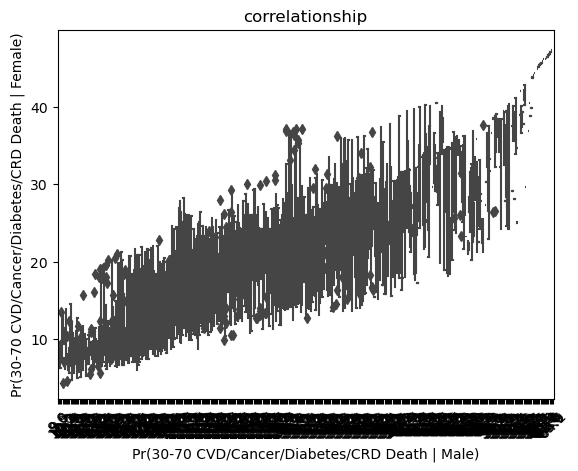

In [19]:
sns.boxplot(x='Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)', y='Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)', data=health)
plt.title("correlationship")
plt.xticks(rotation=45)
plt.show()

<h3>bar graph</h3>

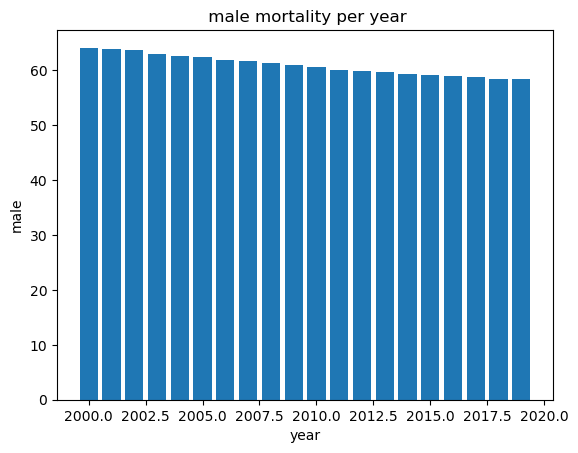

In [20]:
plt.bar(health["Year"],health["Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)"])
plt.title(" male mortality per year")
plt.xlabel("year")
plt.ylabel("male")
plt.show()

<h3>female bar graph motality rate</h3>

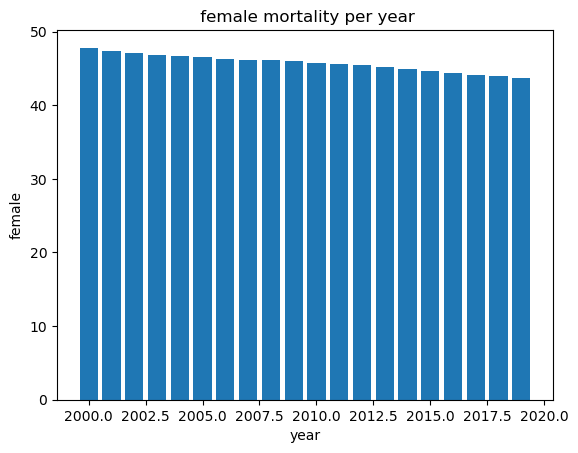

In [21]:
plt.bar(health["Year"],health["Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)"])
plt.title(" female mortality per year")
plt.xlabel("year")
plt.ylabel("female")
plt.show()

<h3>yearly Mortality</h3>

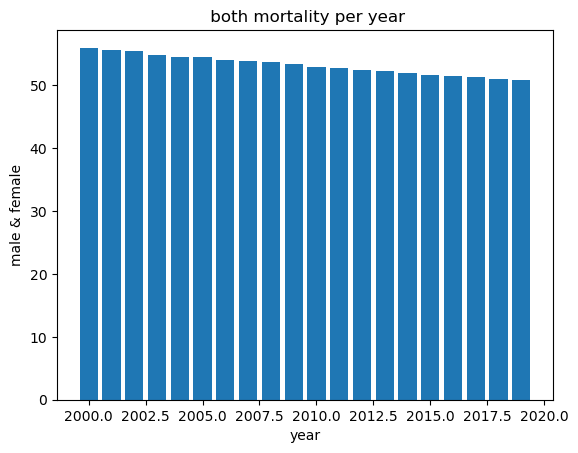

In [22]:
plt.bar(health["Year"],health["Pr(30-70 NCD Mortality | All)"])
plt.title(" both mortality per year")
plt.xlabel("year")
plt.ylabel("male & female")
plt.show()

<h2><b>2.0 Mental health Depression disorder Data Analysis</b></h2>

In [23]:
health2=pd.read_csv("HEALTH/Mental health Depression disorder Data.csv",encoding="latin-1",low_memory=False,index_col=0)
health2.tail(100)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
108453,World,OWID_WRL,2002,210523437.941000,NaN,NaN,NaN,NaN,NaN,NaN
108454,World,OWID_WRL,2003,214411150.750000,NaN,NaN,NaN,NaN,NaN,NaN
108455,World,OWID_WRL,2004,218331898.579000,NaN,NaN,NaN,NaN,NaN,NaN
108456,World,OWID_WRL,2005,222225346.699000,NaN,NaN,NaN,NaN,NaN,NaN
108457,World,OWID_WRL,2006,225596848.087000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


<h2>2.1. Checking the data types</h2>

In [24]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entity                     108553 non-null  object 
 1   Code                       103141 non-null  object 
 2   Year                       108553 non-null  object 
 3   Schizophrenia (%)          25875 non-null   object 
 4   Bipolar disorder (%)       19406 non-null   object 
 5   Eating disorders (%)       100236 non-null  object 
 6   Anxiety disorders (%)      6468 non-null    float64
 7   Drug use disorders (%)     6468 non-null    float64
 8   Depression (%)             6468 non-null    float64
 9   Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), object(6)
memory usage: 9.1+ MB


<h2>2.2Checking at the null values in the data set</h2>

In [25]:
health2.isna().idxmax()

Entity                          0
Code                          112
Year                            0
Schizophrenia (%)            6469
Bipolar disorder (%)         6469
Eating disorders (%)         7321
Anxiety disorders (%)        6468
Drug use disorders (%)       6468
Depression (%)               6468
Alcohol use disorders (%)    6468
dtype: int64

In [26]:
health2.dropna(inplace=True)

In [27]:
health2.isna().idxmax()

Entity                       0
Code                         0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

In [28]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     5488 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       5488 non-null   object 
 3   Schizophrenia (%)          5488 non-null   object 
 4   Bipolar disorder (%)       5488 non-null   object 
 5   Eating disorders (%)       5488 non-null   object 
 6   Anxiety disorders (%)      5488 non-null   float64
 7   Drug use disorders (%)     5488 non-null   float64
 8   Depression (%)             5488 non-null   float64
 9   Alcohol use disorders (%)  5488 non-null   float64
dtypes: float64(4), object(6)
memory usage: 471.6+ KB


In [29]:
health2.shape

(5488, 10)

In [30]:
health2.tail()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


<h2>Converting the string data sets to floats
</h2>

In [31]:
health2['Schizophrenia (%)'] = health2['Schizophrenia (%)'].astype(float)

In [32]:
health2['Bipolar disorder (%)'] = health2['Bipolar disorder (%)'].astype(float)

In [33]:
health2['Eating disorders (%)'] = health2['Eating disorders (%)'].astype(float)

In [34]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     5488 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       5488 non-null   object 
 3   Schizophrenia (%)          5488 non-null   float64
 4   Bipolar disorder (%)       5488 non-null   float64
 5   Eating disorders (%)       5488 non-null   float64
 6   Anxiety disorders (%)      5488 non-null   float64
 7   Drug use disorders (%)     5488 non-null   float64
 8   Depression (%)             5488 non-null   float64
 9   Alcohol use disorders (%)  5488 non-null   float64
dtypes: float64(7), object(3)
memory usage: 471.6+ KB


In [35]:
health2.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.208183,0.716884,0.234023,3.946979,0.833328,3.474504,1.562273
std,0.041998,0.164246,0.154147,1.134810,0.441199,0.671741,0.861973
min,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,0.179452,0.615732,0.121761,3.178912,0.524018,2.955355,0.961545
50%,0.198510,0.693954,0.180378,3.515140,0.709090,3.461421,1.466906
75%,0.230553,0.830217,0.278681,4.659540,0.906843,3.877343,1.853683
max,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


<h2>Visualization</h2>

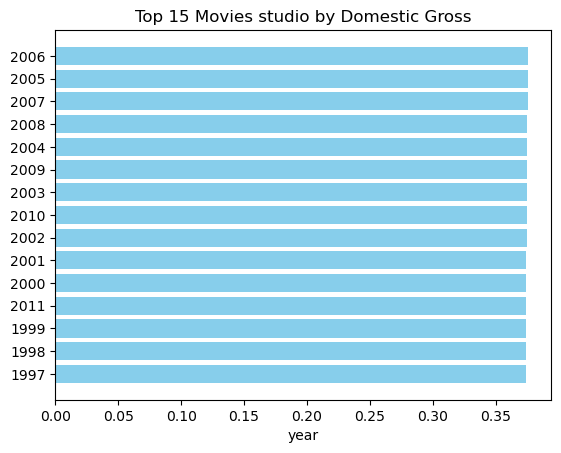

In [36]:
top_Schizophrenia=health2.sort_values(by='Schizophrenia (%)', ascending=False).head(15)

# Plot
#plt.figure(figsize=(10, 8))
plt.barh(top_Schizophrenia["Year"], top_Schizophrenia['Schizophrenia (%)'], color='skyblue')
plt.xlabel("year")
plt.title('Top 15 Movies studio by Domestic Gross')
plt.gca().invert_yaxis()  # Highest grossing at the top

plt.show()

<h2>identifying the outliers</h2>

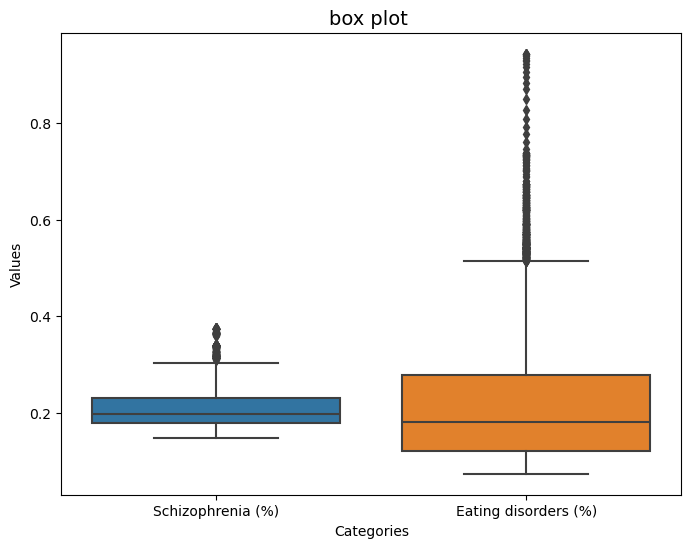

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=health2[["Schizophrenia (%)","Eating disorders (%)"]])
plt.title("box plot ", fontsize=14)
plt.ylabel("Values")
plt.xlabel("Categories")
plt.show()

<h2>Correlationships of the data</h2>

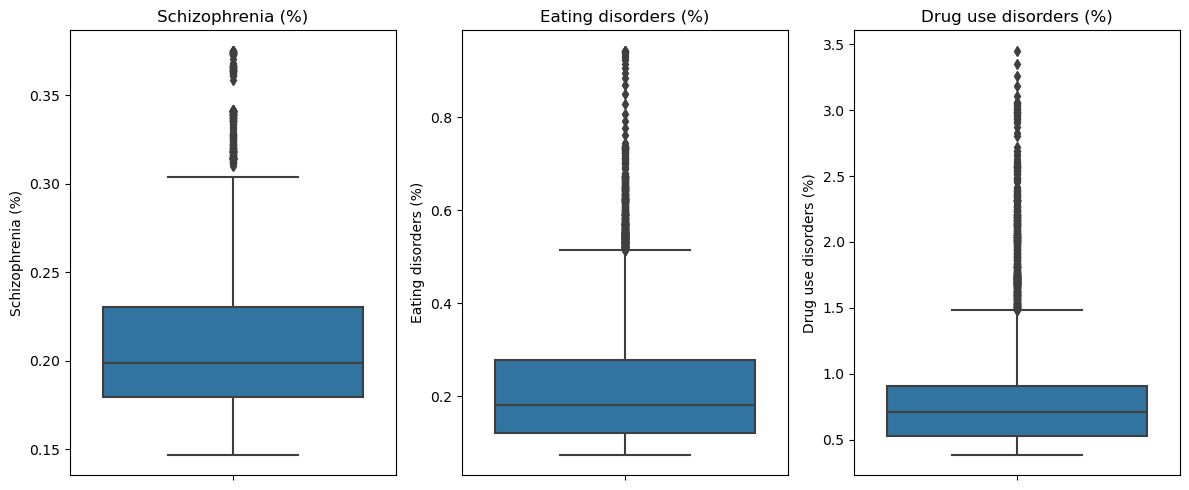

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot each separately
sns.boxplot(y=health2['Schizophrenia (%)'], ax=axes[0])
axes[0].set_title("Schizophrenia (%)")

sns.boxplot(y=health2['Eating disorders (%)'], ax=axes[1])
axes[1].set_title("Eating disorders (%)")

sns.boxplot(y=health2['Drug use disorders (%)'], ax=axes[2])
axes[2].set_title("Drug use disorders (%)")

plt.tight_layout()
plt.show()


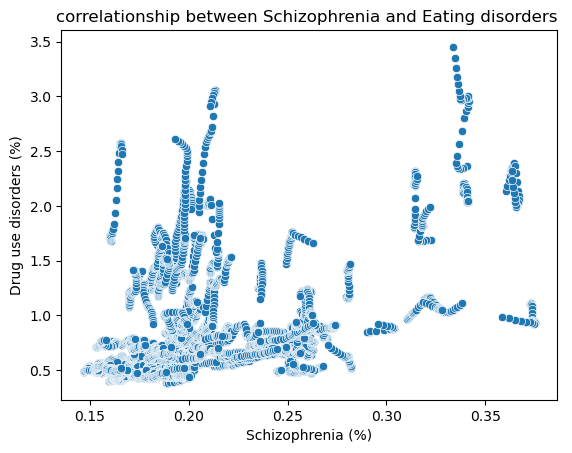

In [39]:
sns.scatterplot(x='Schizophrenia (%)', y='Drug use disorders (%)', data=health2)
plt.title("correlationship between Schizophrenia and Eating disorders ")
plt.show()

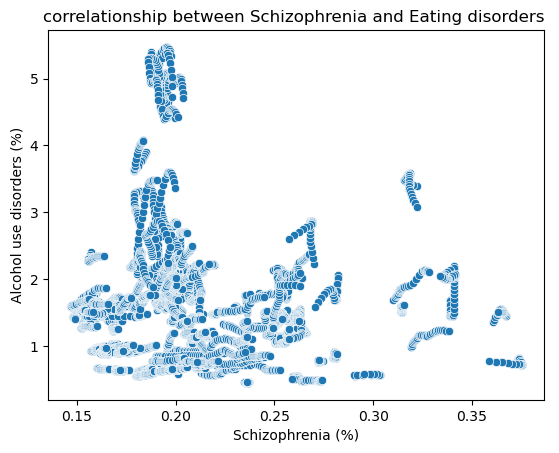

In [40]:
sns.scatterplot(x='Schizophrenia (%)', y='Alcohol use disorders (%)', data=health2)
plt.title("correlationship between Schizophrenia and Eating disorders ")
plt.show()

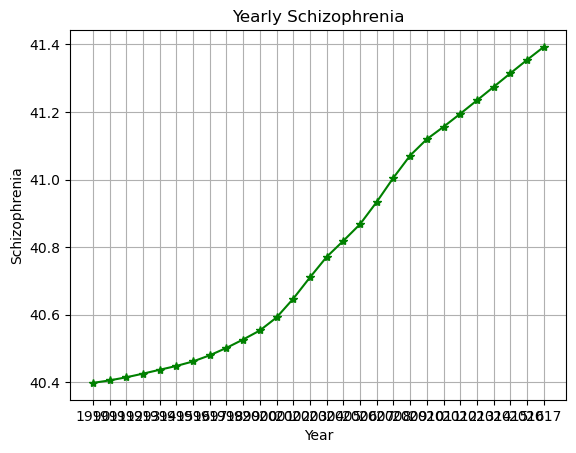

In [41]:
DESES = health2.groupby('Year')['Schizophrenia (%)'].sum().reset_index()

plt.plot(DESES['Year'], DESES['Schizophrenia (%)'], marker='*', linestyle='-', color='green')
plt.title('Yearly Schizophrenia')
plt.xlabel('Year')
plt.ylabel('Schizophrenia')
plt.grid(True)
plt.show()

<h2></h2>

<h2>Road accident</h2>

In [42]:
road=pd.read_csv("HEALTH/road_death_2019.csv")
road.head()

,continent,code,country,year,road traffic death rate
0,Americas,ATG,Antigua and Barbuda,2019,0.00
1,Western Pacific,FSM,Micronesia (Federated States of),2019,0.16
2,South-East Asia,MDV,Maldives,2019,1.63
3,Western Pacific,KIR,Kiribati,2019,1.92
4,Eastern Mediterranean,EGY,Egypt,2019,10.10


In [43]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continent                3660 non-null   object 
 1   code                     3660 non-null   object 
 2   country                  3660 non-null   object 
 3   year                     3660 non-null   int64  
 4   road traffic death rate  3660 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 143.1+ KB


In [44]:
#renaming year
road.rename(columns={"year":"Year"},inplace=True)

In [45]:
road.shape

(3660, 5)

In [46]:
road.isna().idxmax()

continent                  0
code                       0
country                    0
Year                       0
road traffic death rate    0
dtype: int64

<h2>Visualization</h2>

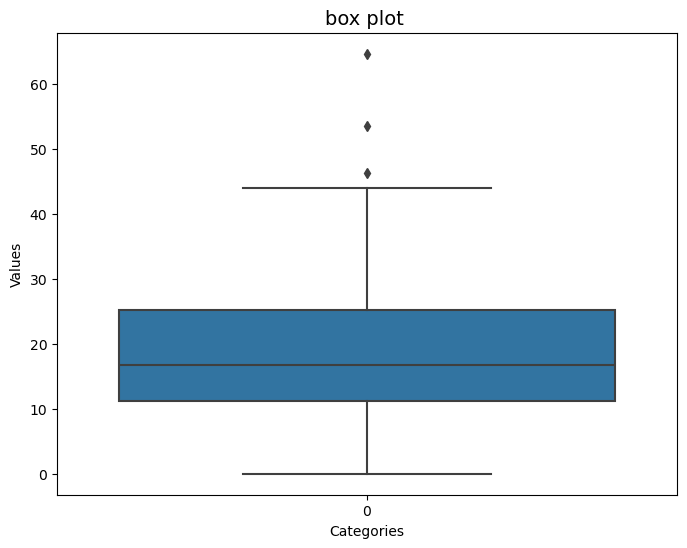

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=road["road traffic death rate"])
plt.title("box plot ", fontsize=14)
plt.ylabel("Values")
plt.xlabel("Categories")
plt.show()

<h2>suicide_rates_2019</h2>

In [48]:
suicide=pd.read_csv("HEALTH/suicide_rates_2019.csv")
suicide.head()

,Indicator,continent,code,country,year,sex,Suicide Rate
0,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Male,0.00
1,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Female,0.16
2,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Both sexes,0.31
3,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Both sexes,0.32
4,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Male,0.49


In [49]:
suicide.shape

(10980, 7)

In [50]:
#renaming year
suicide.rename(columns={"year":"Year"},inplace=True)

In [51]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indicator     10980 non-null  object 
 1   continent     10980 non-null  object 
 2   code          10980 non-null  object 
 3   country       10980 non-null  object 
 4   Year          10980 non-null  int64  
 5   sex           10980 non-null  object 
 6   Suicide Rate  10980 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 600.6+ KB


In [52]:
suicide.duplicated().idxmax()

0

In [53]:
suicide.idxmax()

Indicator          0
continent         13
code             117
country          117
Year               0
sex                0
Suicide Rate    2932
dtype: int64

In [54]:
suicide.dropna()

,Indicator,continent,code,country,Year,sex,Suicide Rate
0,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Male,0.00
1,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Female,0.16
2,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Both sexes,0.31
3,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Both sexes,0.32
4,Age-standardized suicide rates (per 100 000 po...,Americas,BRB,Barbados,2019,Male,0.49
...,...,...,...,...,...,...,...
10975,Age-standardized suicide rates (per 100 000 po...,Africa,GIN,Guinea,2000,Both sexes,9.73
10976,Age-standardized suicide rates (per 100 000 po...,Africa,GHA,Ghana,2000,Both sexes,9.75
10977,Age-standardized suicide rates (per 100 000 po...,Europe,MLT,Malta,2000,Male,9.75
10978,Age-standardized suicide rates (per 100 000 po...,Africa,SYC,Seychelles,2000,Both sexes,9.76


In [55]:
suicide.isna().idxmax()

Indicator       0
continent       0
code            0
country         0
Year            0
sex             0
Suicide Rate    0
dtype: int64

In [56]:
suicide["Year"] = suicide["Year"].round().astype(int)

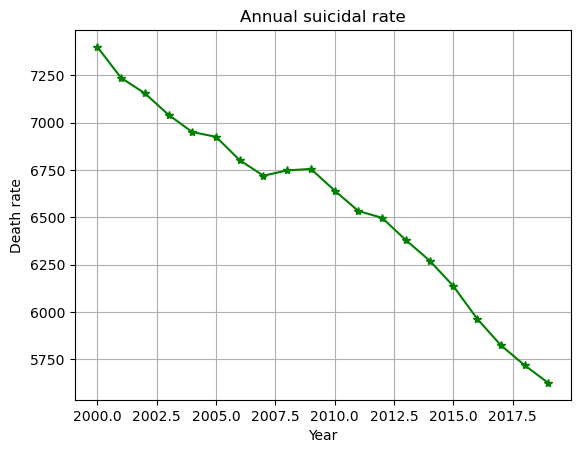

In [57]:
#yearly suicidal rate 
SUI = suicide.groupby('Year')['Suicide Rate'].sum().reset_index()

plt.plot(SUI['Year'], SUI['Suicide Rate'], marker='*', linestyle='-', color='green')
plt.title('Annual suicidal rate')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.grid(True)
plt.show()

In [58]:
#continent with the highest death rate
suicide.value_counts().idxmax()

('Age-standardized suicide rates (per 100 000 population)',
 'Africa',
 'AGO',
 'Angola',
 2000,
 'Both sexes',
 17.56)

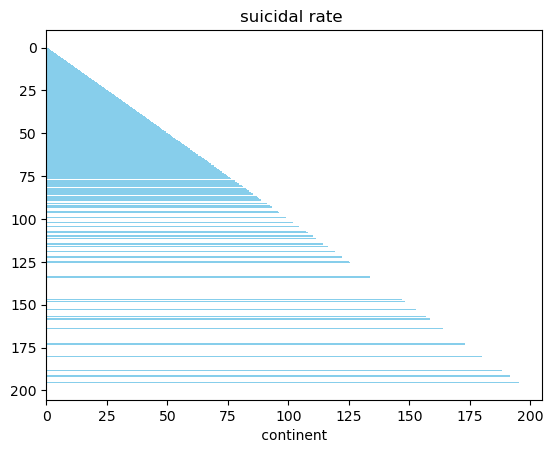

In [59]:
#top_suicidal_rate =suicide.sort_values(by='Suicide Rate', ascending=False).head(15)


#plt.figure(figsize=(10, 8))
plt.barh(suicide["Suicide Rate"], suicide['Suicide Rate'], color='skyblue')
plt.xlabel(' continent ')
plt.title('suicidal rate ')
plt.gca().invert_yaxis()  # Highest grossing at the top

plt.show()

<h2>suicide-rate-by-country-2023</h2>

In [60]:
suicide2=pd.read_csv("HEALTH/suicide-rate-by-country-2023.csv")
suicide2.head()

,country,rate2019both,rate2019male,rate2019female
0,Lesotho,72.4,116.0,30.1
1,Guyana,40.3,63.0,17.4
2,Eswatini,29.4,55.1,4.7
3,South Korea,28.6,40.2,16.9
4,Kiribati,28.3,48.6,8.7


In [61]:
suicide2.duplicated().idxmax()

0

In [62]:
suicide2.isna().idxmax()

country           0
rate2019both      0
rate2019male      0
rate2019female    0
dtype: int64

<h>Alcohol disorder</h2>

In [63]:
alcohol=pd.read_csv("HEALTH/share-with-alcohol-and-substance-use-disorders 1990-2016.csv")
alcohol.head()

,Entity,Code,Year,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)
0,Afghanistan,AFG,1990,1.530549
1,Afghanistan,AFG,1991,1.530105
2,Afghanistan,AFG,1992,1.529283
3,Afghanistan,AFG,1993,1.530944
4,Afghanistan,AFG,1994,1.532076


In [64]:
alcohol.isna().idxmax()

Entity                                                                                     0
Code                                                                                     108
Year                                                                                       0
Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)      0
dtype: int64

In [65]:
alcohol.dropna()

,Entity,Code,Year,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)
0,Afghanistan,AFG,1990,1.530549
1,Afghanistan,AFG,1991,1.530105
2,Afghanistan,AFG,1992,1.529283
3,Afghanistan,AFG,1993,1.530944
4,Afghanistan,AFG,1994,1.532076
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,2.300518
6152,Zimbabwe,ZWE,2013,2.306298
6153,Zimbabwe,ZWE,2014,2.311257
6154,Zimbabwe,ZWE,2015,2.315047


In [66]:
#renaming the column name 
alcohol.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)": "prevalence-alch_subst_dis(%)"}, inplace=True)

In [67]:
alcohol.head()

,Entity,Code,Year,prevalence-alch_subst_dis(%)
0,Afghanistan,AFG,1990,1.530549
1,Afghanistan,AFG,1991,1.530105
2,Afghanistan,AFG,1992,1.529283
3,Afghanistan,AFG,1993,1.530944
4,Afghanistan,AFG,1994,1.532076


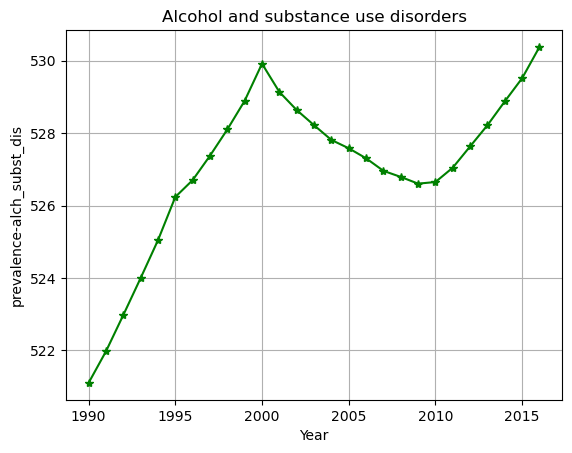

In [68]:
#plotting of the alcohol and substance use disorders
ALCOH = alcohol.groupby('Year')['prevalence-alch_subst_dis(%)'].sum().reset_index()

plt.plot(ALCOH['Year'], ALCOH['prevalence-alch_subst_dis(%)'], marker='*', linestyle='-', color='green')
plt.title('Alcohol and substance use disorders')
plt.xlabel('Year')
plt.ylabel('prevalence-alch_subst_dis')
plt.grid(True)
plt.show()

In [69]:
#filling the missing values with mode
for col in alcohol.select_dtypes(include='object').columns:
    if alcohol[col].isnull().any():
        mode_val = alcohol[col].mode()[0]
        alcohol[col].fillna(mode_val, inplace=True)

In [70]:
alcohol.isna().idxmax()

Entity                          0
Code                            0
Year                            0
prevalence-alch_subst_dis(%)    0
dtype: int64

In [71]:
#country with the highest case occurence
alcohol.value_counts().idxmax()

('Afghanistan', 'AFG', 1990, 1.530548943)

In [72]:
#displaying the data
alcohol.head()

,Entity,Code,Year,prevalence-alch_subst_dis(%)
0,Afghanistan,AFG,1990,1.530549
1,Afghanistan,AFG,1991,1.530105
2,Afghanistan,AFG,1992,1.529283
3,Afghanistan,AFG,1993,1.530944
4,Afghanistan,AFG,1994,1.532076


In [73]:
#mg_data=pd.merge(health,health2,on="Ye
health2["Year"] = health2["Year"].astype(int)

In [83]:
#combining the hEALTH DATA SETS FILES
health_comb=pd.merge(health,health2,on="Year")
health_comb.rename(columns={"countries":"country"},inplace=True)
health_comb.head()

,country,Year,Pr(30-70 NCD Mortality | All),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female),Entity,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,2017,35.5,35.0,35.9,Afghanistan,AFG,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Afghanistan,2017,35.5,35.0,35.9,Albania,ALB,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
2,Afghanistan,2017,35.5,35.0,35.9,Algeria,DZA,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,Afghanistan,2017,35.5,35.0,35.9,American Samoa,ASM,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
4,Afghanistan,2017,35.5,35.0,35.9,Andorra,AND,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050


In [85]:
#extracting files
health_comb.to_csv('health_comb.csv', index=False)

In [84]:
#combining the suicidal cases files
suicide_comb=pd.merge(suicide,suicide2,on="country")
suicide_comb.head()

,Indicator,continent,code,country,Year,sex,Suicide Rate,rate2019both,rate2019male,rate2019female
0,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Male,0.00,0.4,0.0,0.8
1,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Both sexes,0.32,0.4,0.0,0.8
2,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2019,Female,0.60,0.4,0.0,0.8
3,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2018,Male,0.00,0.4,0.0,0.8
4,Age-standardized suicide rates (per 100 000 po...,Americas,ATG,Antigua and Barbuda,2018,Both sexes,0.32,0.4,0.0,0.8


In [86]:
suicide_comb.to_csv('suicide_comb.csv', index=False)

In [76]:
#combining road and alcohol file
road_alcohol=pd.merge(road,alcohol,on="Year")
road_alcohol.head()


,continent,code,country,Year,road traffic death rate,Entity,Code,prevalence-alch_subst_dis(%)
0,Americas,ATG,Antigua and Barbuda,2016,0.0,Afghanistan,AFG,1.809625
1,Americas,ATG,Antigua and Barbuda,2016,0.0,Albania,ALB,2.325538
2,Americas,ATG,Antigua and Barbuda,2016,0.0,Algeria,DZA,1.485915
3,Americas,ATG,Antigua and Barbuda,2016,0.0,American Samoa,ASM,1.622432
4,Americas,ATG,Antigua and Barbuda,2016,0.0,Andean Latin America,AFG,2.154291


In [77]:
#EXTRACTING FILES
road_alcohol.to_csv('road_alcohol.csv', index=False)

In [78]:
#big data
#big_data=pd.merge([health_comb,road_alcohol,suicide_comb],on="country")#
#combined_df = pd.concat([health_comb, road_alcohol, suicide_comb], ignore_index=True)
#combined_df.tail(50)

In [79]:
#health and the alcohol consumption
health_alco=pd.merge(health,alcohol,on="Year")
health_alco.head()

,countries,Year,Pr(30-70 NCD Mortality | All),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female),Entity,Code,prevalence-alch_subst_dis(%)
0,Afghanistan,2016,35.6,35.1,36.0,Afghanistan,AFG,1.809625
1,Afghanistan,2016,35.6,35.1,36.0,Albania,ALB,2.325538
2,Afghanistan,2016,35.6,35.1,36.0,Algeria,DZA,1.485915
3,Afghanistan,2016,35.6,35.1,36.0,American Samoa,ASM,1.622432
4,Afghanistan,2016,35.6,35.1,36.0,Andean Latin America,AFG,2.154291


In [80]:
#rd_alc_helth=pd.merge(road_alcohol,health,on="Year")
#rd_alc_helth.head()